In [ ]:
from experiments.experiment import Experiment
from experiments.parser import get_parser
from rvae.utils.save_utils import load_model
from rvae.vizualization.visualization import (
    plot_geodesics,
    plot_latent_space,
    plot_brownian_motion,
    plot_variance,
)

In [2]:
parser = get_parser()

In [3]:
args = parser.parse_args(
    args=[
        "--model",
        "RVAE",
        "--dataset",
        "fmnist",
        "--enc_layers",
        "300",
        "300",
        "--dec_layers",
        "300",
        "300",
        "--latent_dim",
        "2",
        "--num_centers",
        "350",
        "--num_components",
        "1",
        "--device",
        "cpu",
        "--ckpt_path",
        # "/home/prz/PROJECTS/rvae_reproduction/saved_models/RVAE/fmnist_warmup",
        "/home/prz/PROJECTS/rvae_reproduction/saved_models/RVAE/fmnist_epoch100ckpt",
    ]
)

In [4]:
exp = Experiment(args)

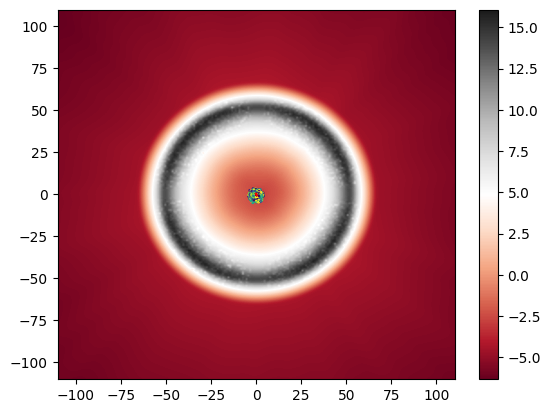

(array([[-0.10663815,  0.4416331 ],
        [-0.0862721 ,  0.39304397],
        [-0.06590606,  0.34445485],
        [-0.04554001,  0.29586574],
        [-0.02517396,  0.24727663],
        [-0.00480792,  0.19868751],
        [ 0.01555813,  0.15009837],
        [ 0.03592418,  0.10150927],
        [ 0.05629022,  0.05292015],
        [ 0.07665627,  0.00433099],
        [ 0.09702232, -0.04425809],
        [ 0.11738837, -0.09284721],
        [ 0.13775441, -0.14143634],
        [ 0.15812045, -0.19002542],
        [ 0.1784865 , -0.23861454],
        [ 0.19885255, -0.2872037 ],
        [ 0.2192186 , -0.33579284],
        [ 0.23958464, -0.38438195],
        [ 0.2599507 , -0.43297103],
        [ 0.28031674, -0.4815601 ]], dtype=float32),
 tensor([[-0.1066,  0.4416],
         [-0.0873,  0.3955],
         [-0.0679,  0.3493],
         [-0.0486,  0.3032],
         [-0.0292,  0.2570],
         [-0.0099,  0.2108],
         [ 0.0094,  0.1647],
         [ 0.0288,  0.1185],
         [ 0.0481,  0.0724],
  

In [ ]:
import torch

plot_geodesics(
    model=exp.model,
    data_loader=exp.train_loader,
    save_dir="/home/prz/PROJECTS/rvae_reproduction/notebooks",
    device=torch.device("cpu"),
)

---

In [9]:
# exp.load_model(pretrained_path=args.ckpt_path)

In [10]:
exp.fixed_load_just_model(pretrained_path=args.ckpt_path)

In [11]:
exp.model

RVAE(
  (encoder): MLP(
    (net): Sequential(
      (0): Linear(in_features=784, out_features=300, bias=True)
      (1): Softplus(beta=1.0, threshold=20.0)
      (2): Linear(in_features=300, out_features=300, bias=True)
      (3): Softplus(beta=1.0, threshold=20.0)
    )
  )
  (q_mu): Sequential(
    (0): Linear(in_features=300, out_features=2, bias=True)
  )
  (q_t): Sequential(
    (0): Linear(in_features=300, out_features=1, bias=True)
    (1): Softplus(beta=1.0, threshold=20.0)
    (2): Hardtanh(min_val=0.0001, max_val=5.0)
  )
  (dummy_pmu): MLP(
    (net): Sequential(
      (0): Linear(in_features=2, out_features=300, bias=True)
      (1): Softplus(beta=1.0, threshold=20.0)
      (2): Linear(in_features=300, out_features=300, bias=True)
      (3): Softplus(beta=1.0, threshold=20.0)
      (4): Linear(in_features=300, out_features=784, bias=True)
      (5): Sigmoid()
    )
  )
  (p_mu): MLP(
    (net): Sequential(
      (0): Linear(in_features=2, out_features=300, bias=True)
     

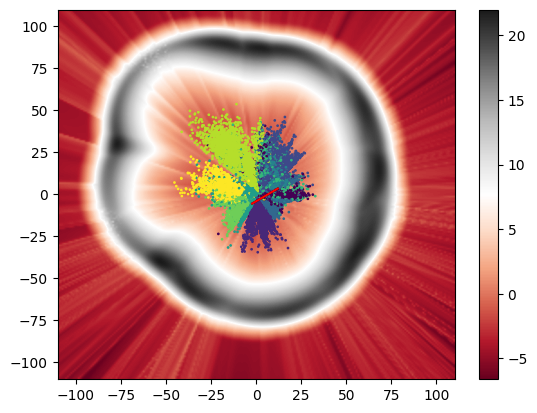

(array([[12.017926  ,  3.5280037 ],
        [11.270378  ,  3.0571897 ],
        [10.52283   ,  2.5863757 ],
        [ 9.775282  ,  2.1155615 ],
        [ 9.027734  ,  1.6447476 ],
        [ 8.280186  ,  1.1739336 ],
        [ 7.5326376 ,  0.7031195 ],
        [ 6.7850895 ,  0.23230553],
        [ 6.037542  , -0.23850846],
        [ 5.2899933 , -0.7093226 ],
        [ 4.5424457 , -1.1801364 ],
        [ 3.7948976 , -1.6509504 ],
        [ 3.0473495 , -2.1217647 ],
        [ 2.2998018 , -2.5925784 ],
        [ 1.5522535 , -3.0633926 ],
        [ 0.8047054 , -3.5342064 ],
        [ 0.05715728, -4.0050206 ],
        [-0.69039106, -4.475835  ],
        [-1.4379385 , -4.9466486 ],
        [-2.1854868 , -5.4174623 ]], dtype=float32),
 tensor([[12.0179,  3.5280],
         [11.3078,  3.0807],
         [10.5976,  2.6335],
         [ 9.8874,  2.1862],
         [ 9.1772,  1.7389],
         [ 8.4671,  1.2916],
         [ 7.7569,  0.8444],
         [ 7.0467,  0.3971],
         [ 6.3366, -0.0502],
  

In [18]:
plot_geodesics(
    model=exp.model,
    data_loader=exp.train_loader,
    save_dir="/home/prz/PROJECTS/rvae_reproduction/notebooks",
    device=torch.device("cpu"),
)

In [17]:
plot_latent_space(
    model=exp.model,
    data_loader=exp.train_loader,
    save_dir="/home/prz/PROJECTS/rvae_reproduction/notebooks",
    device=torch.device("cpu"),
)

In [ ]:
# TODO: establish how to get the brownian motion samples
plot_brownian_motion(model=exp.model, bm_samples=)

In [ ]:
import torch

checkpiont = torch.load(args.ckpt_path, map_location="cpu")

In [ ]:
checkpiont["model_state_dict"]["pr_means"].shape

torch.Size([1, 2])